# Classification: Persistent vs Non-Persistent

In [1]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data=pd.read_csv(r"C:\Users\DD\Desktop\Persistent_vs_NonPersistent\Persistent_vs_NonPersistent.csv")

In [3]:
data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [4]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [5]:
data.tail(3)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Ptid                                                                3424 non-null   object 
 1   Persistency_Flag                                                    3424 non-null   object 
 2   Gender                                                              3424 non-null   object 
 3   Race                                                                3424 non-null   object 
 4   Ethnicity                                                           3424 non-null   object 
 5   Region                                                              3424 non-null   object 
 6   Age_Bucket                                                          3424 non-null   object 
 7   Ntm_Speciality 

In [7]:
data.info

<bound method DataFrame.info of        Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Spec

In [8]:
data.describe(include="all")

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424.000000
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,NaN
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,NaN
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3066,3382,1788,3232,3357,3370,3413,3410,3355,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239486
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094914
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [9]:
data.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [10]:
#any null value present
data.isnull().values.any()

True

In [11]:
data.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

<Axes: >

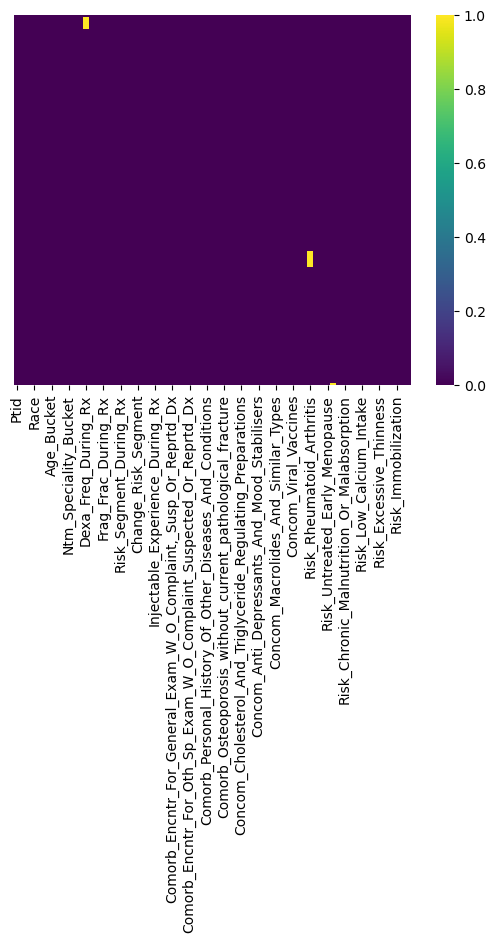

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

# Filling missing values

In [13]:
data["Dexa_Freq_During_Rx"].fillna(data["Dexa_Freq_During_Rx"].median(),inplace=True)


data["Risk_Rheumatoid_Arthritis"].fillna(data["Risk_Rheumatoid_Arthritis"].mode()[0],inplace=True)
data["Risk_Patient_Parent_Fractured_Their_Hip"].fillna(data["Risk_Patient_Parent_Fractured_Their_Hip"].mode()[0],inplace=True)


<Axes: >

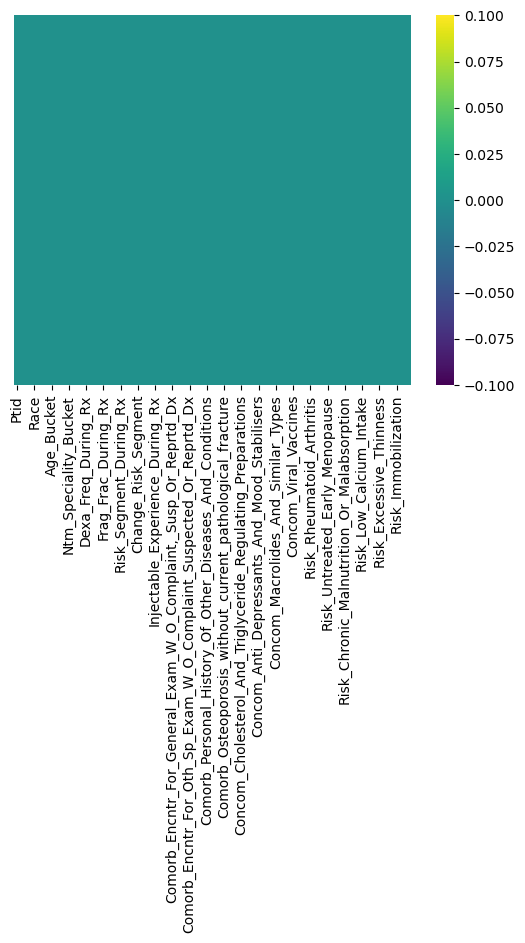

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")


In [15]:
cat_data=data.select_dtypes(include="object")
num_data=data.select_dtypes(exclude="object")

In [16]:
cat_data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,N
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,Y,N,N,N,N,N,N
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,N,Y,N,N,N,N,N,N
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N


In [17]:
num_data

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0.0,0
1,0.0,0
2,0.0,2
3,0.0,1
4,0.0,1
...,...,...
3419,0.0,1
3420,0.0,0
3421,7.0,1
3422,0.0,0


# Data Visualization

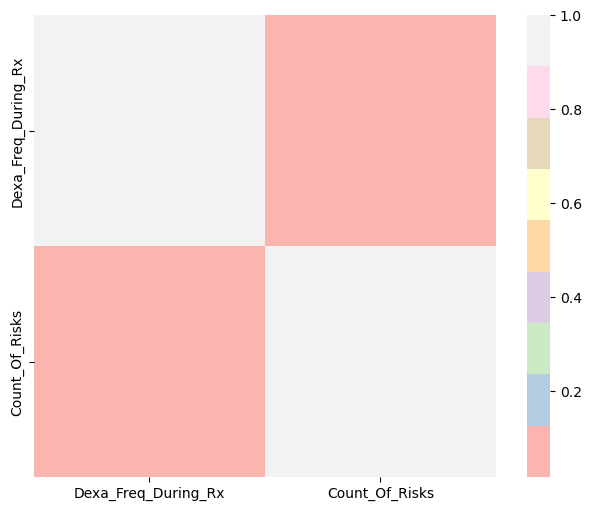

In [18]:
#Examaning a correlation matrix of all the features
corrmat=num_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmat,cmap="Pastel1",square=True)
plt.show()

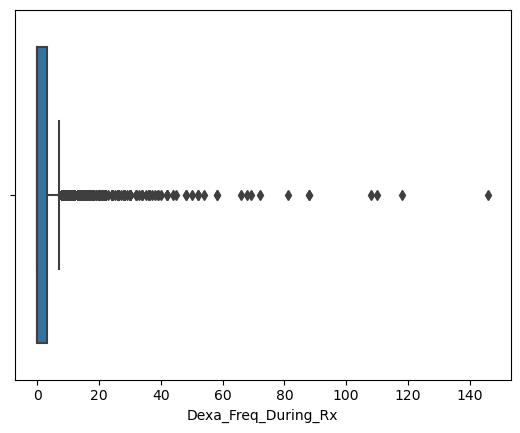

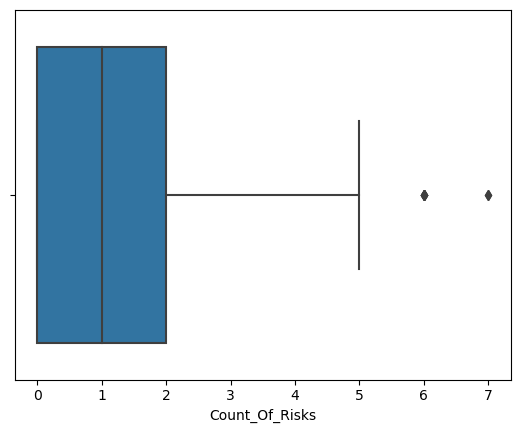

In [19]:
for i in num_data.columns:
    sns.boxplot(x=data[i])  # Use data instead of num_data here
    plt.show()

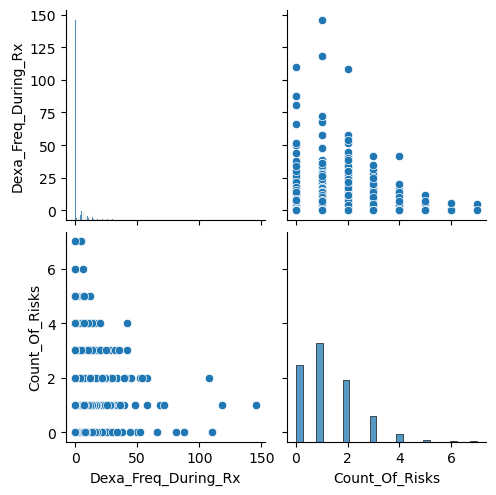

In [20]:
sns.pairplot(data)

<Axes: xlabel='Persistency_Flag', ylabel='count'>

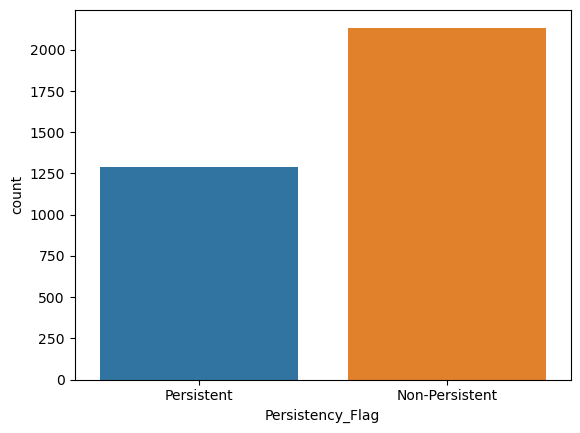

In [21]:
sns.countplot(x="Persistency_Flag",data=data)

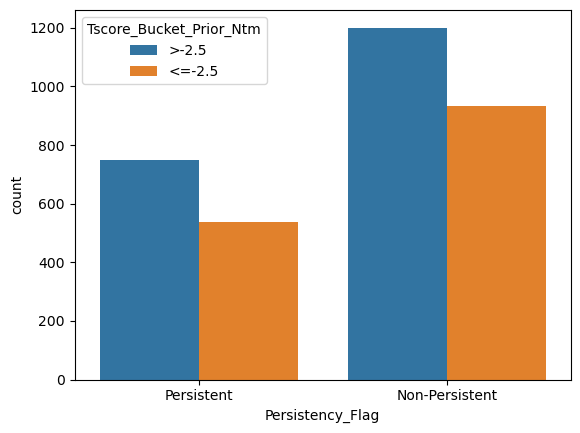

In [22]:
sns.countplot(x="Persistency_Flag",hue="Tscore_Bucket_Prior_Ntm",data=data)
plt.show()

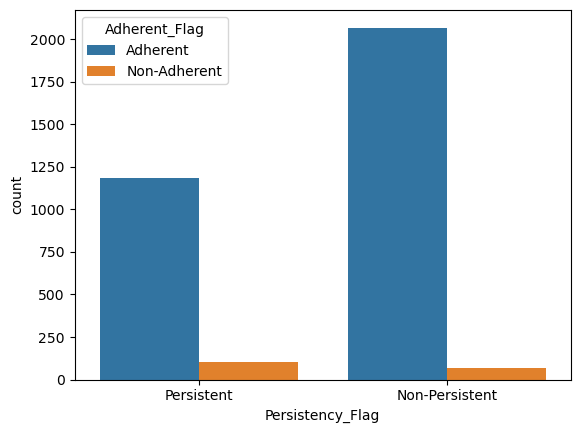

In [23]:
sns.countplot(x="Persistency_Flag",hue='Adherent_Flag', data=data)
plt.show()

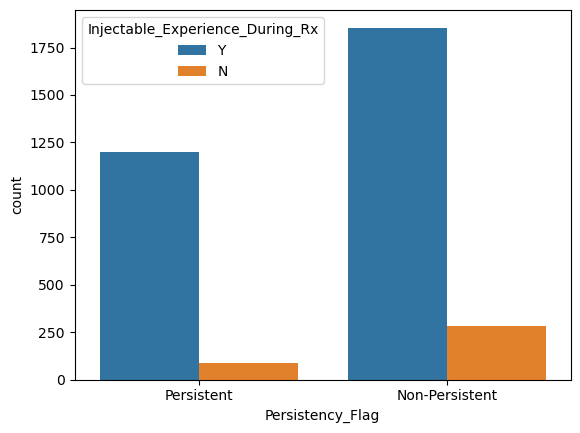

In [24]:
sns.countplot(x="Persistency_Flag",hue='Injectable_Experience_During_Rx', data=data)
plt.show()

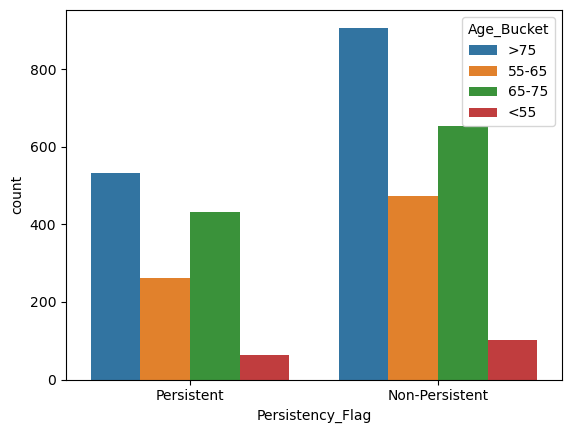

In [25]:
sns.countplot(x="Persistency_Flag", hue='Age_Bucket', data=data)
plt.show()

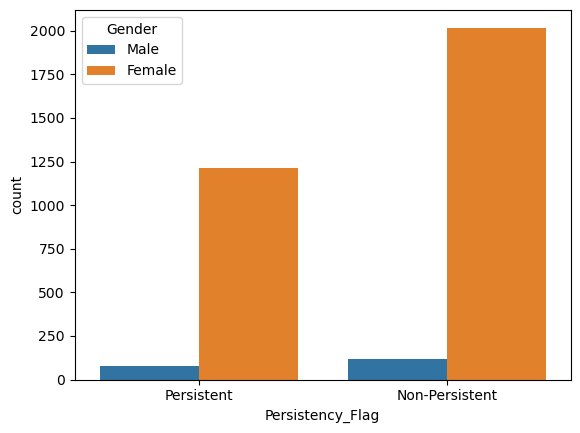

In [26]:
sns.countplot(x="Persistency_Flag", hue='Gender', data=data)
plt.show()

<Axes: xlabel='Persistency_Flag', ylabel='count'>

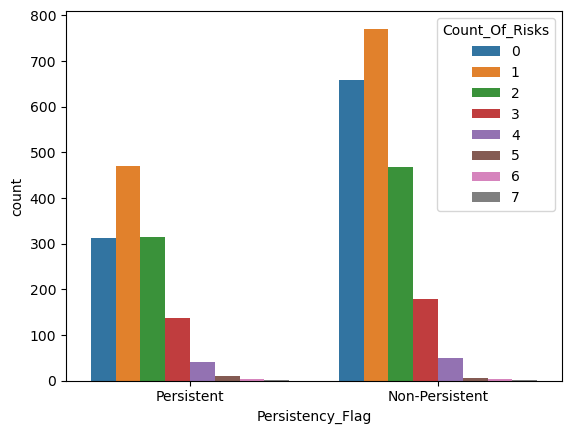

In [27]:
sns.countplot(x="Persistency_Flag", hue='Count_Of_Risks', data=data)

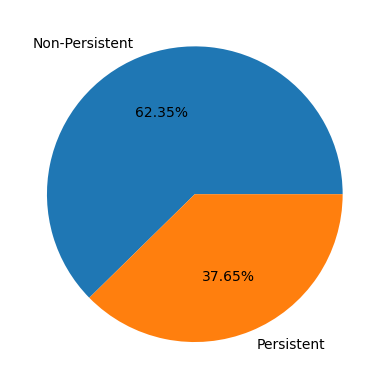

In [28]:
b=data.groupby("Persistency_Flag")["Persistency_Flag"].count()
plt.pie(b,labels=b.index,autopct="%.2f%%")
plt.show()

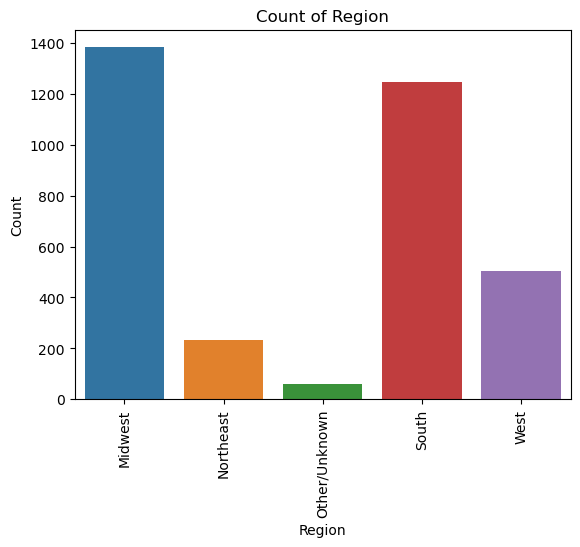

In [29]:
a=data.groupby("Region")["Region"].count()
sns.barplot(x=a.index,y=a.values)
plt.xticks(rotation=90)
plt.title("Count of Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Persistency_Flag', ylabel='count'>

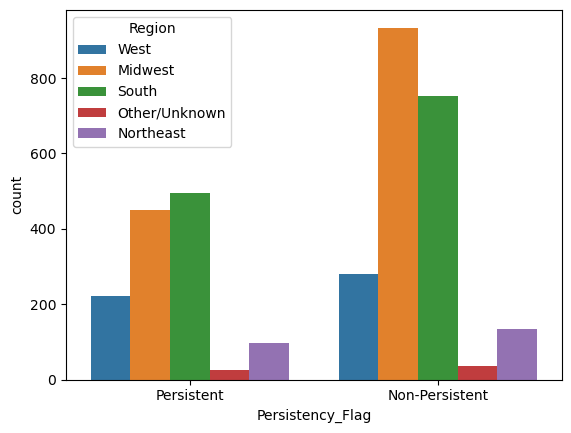

In [30]:
sns.countplot(x="Persistency_Flag", hue='Region', data=data)

<Axes: xlabel='Age_Bucket', ylabel='Count'>

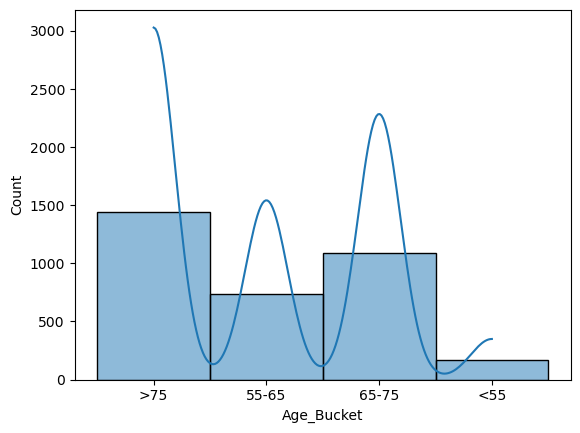

In [31]:
sns.histplot(data["Age_Bucket"],bins=10,kde=True)

# Outlier detection and removal

In [32]:
from scipy import stats
z_scores=stats.zscore(data["Dexa_Freq_During_Rx"])
z_score_outliers=(z_scores<-3)|(z_scores>3)

In [33]:
z_score_outlier_rows=data[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Ptid Persistency_Flag  Gender           Race     Ethnicity     Region  \
198    P199       Persistent  Female      Caucasian  Not Hispanic      South   
241    P242       Persistent  Female      Caucasian  Not Hispanic    Midwest   
541    P542       Persistent  Female      Caucasian  Not Hispanic    Midwest   
651    P652       Persistent  Female      Caucasian  Not Hispanic    Midwest   
1265  P1266       Persistent  Female      Caucasian  Not Hispanic       West   
1360  P1361       Persistent  Female      Caucasian  Not Hispanic      South   
1370  P1371   Non-Persistent  Female      Caucasian  Not Hispanic      South   
1398  P1399       Persistent  Female          Asian  Not Hispanic      South   
1734  P1735       Persistent    Male      Caucasian  Not Hispanic    Midwest   
1838  P1839       Persistent  Female      Caucasian  Not Hispanic  Northeast   
1854  P1855       Persistent    Male      Caucasian  Not Hispanic  Northeast   
1901  P190

In [34]:
data.shape

(3424, 69)

In [35]:
x=(z_scores>-3)&(z_scores<3)

In [36]:
new_data=data[x]   # create a new data frame

In [37]:
new_data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [38]:
z_scores=stats.zscore(new_data["Count_Of_Risks"])
z_score_outlier=(z_scores<-3)|(z_scores>3)

In [39]:
z_score_outlier_row=new_data[z_score_outlier]
print("outliers detected by Z-score:",z_score_outlier_row)

outliers detected by Z-score:        Ptid Persistency_Flag  Gender              Race     Ethnicity  \
302    P303       Persistent  Female         Caucasian  Not Hispanic   
342    P343       Persistent  Female         Caucasian  Not Hispanic   
352    P353       Persistent  Female         Caucasian  Not Hispanic   
495    P496       Persistent  Female         Caucasian  Not Hispanic   
557    P558       Persistent  Female         Caucasian  Not Hispanic   
731    P732       Persistent  Female         Caucasian  Not Hispanic   
741    P742       Persistent  Female         Caucasian  Not Hispanic   
754    P755       Persistent  Female         Caucasian  Not Hispanic   
787    P788   Non-Persistent  Female         Caucasian  Not Hispanic   
817    P818       Persistent  Female  African American  Not Hispanic   
1059  P1060   Non-Persistent  Female         Caucasian  Not Hispanic   
1112  P1113       Persistent  Female         Caucasian  Not Hispanic   
1247  P1248   Non-Persistent    Ma

In [40]:
p=(z_scores>-3)&(z_scores<3)
data_new=new_data[p]

In [41]:
data_new

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [42]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 
'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator',
'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
'Comorb_Encounter_For_Immunization','Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',  'Comorb_Vitamin_D_Deficiency', 
'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 
'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm',
'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers',
'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 
'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines',
'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism',
'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip',
'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',
'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy',
'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls','Count_Of_Risks']
encoder=OneHotEncoder(drop='first',sparse=False)

In [43]:
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(data[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))

In [44]:
encoder_cols

,Ptid_P10,Ptid_P100,Ptid_P1000,Ptid_P1001,Ptid_P1002,Ptid_P1003,Ptid_P1004,Ptid_P1005,Ptid_P1006,Ptid_P1007,...,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y,Count_Of_Risks_1,Count_Of_Risks_2,Count_Of_Risks_3,Count_Of_Risks_4,Count_Of_Risks_5,Count_Of_Risks_6,Count_Of_Risks_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x = encoder_cols
y = data['Persistency_Flag']

In [46]:
x

,Ptid_P10,Ptid_P100,Ptid_P1000,Ptid_P1001,Ptid_P1002,Ptid_P1003,Ptid_P1004,Ptid_P1005,Ptid_P1006,Ptid_P1007,...,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y,Count_Of_Risks_1,Count_Of_Risks_2,Count_Of_Risks_3,Count_Of_Risks_4,Count_Of_Risks_5,Count_Of_Risks_6,Count_Of_Risks_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
y

0           Persistent
1       Non-Persistent
2       Non-Persistent
3       Non-Persistent
4       Non-Persistent
             ...      
3419        Persistent
3420        Persistent
3421        Persistent
3422    Non-Persistent
3423    Non-Persistent
Name: Persistency_Flag, Length: 3424, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)# train ko sahi karna he bas test ko nahi 5.1asel tar 0.51eraise karto 
x_test=scaler.fit_transform(x_test)#trans.. data tranform kaarto =fittrans..fit karta transform karto 

In [51]:
svcm=SVC(kernel='linear')

In [52]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred=svcm.predict(x_test)

In [54]:
acc=accuracy_score(y_test,y_pred)
acc

0.8072992700729927

In [55]:
print("Accuracy:{:.2f}%".format(acc*100))

Accuracy:80.73%


In [56]:
print(classification_report(y_test,y_pred))#report =classification learn karyala help karto

                precision    recall  f1-score   support

Non-Persistent       0.81      0.91      0.86       431
    Persistent       0.81      0.63      0.71       254

      accuracy                           0.81       685
     macro avg       0.81      0.77      0.78       685
  weighted avg       0.81      0.81      0.80       685



In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[393  38]
 [ 94 160]]


<Axes: >

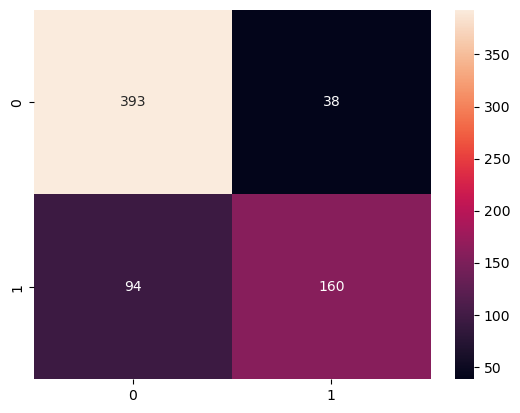

In [111]:
sns.heatmap(cm, annot=True,fmt='.3g')

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

yb = label_binarize(y, classes=[0,1])
nc=yb.shape[1]
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=42,decision_function_shape='ovr'))
y_score=classifier.fit(x_train,y_train).decision_function(x_test)

In [100]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label='Persistent')
    roc_auc[i] = auc(fpr[i], tpr[i])

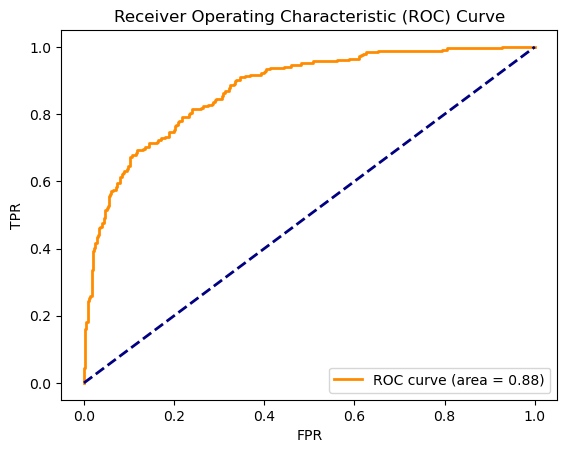

In [101]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[0]))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}


In [62]:
svcm = SVC()

In [63]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)


In [64]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [65]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 10, 'kernel': 'sigmoid'}


In [66]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [67]:
best_svm.fit(x_train, y_train)

SVC(C=10, kernel='sigmoid')

In [68]:
y_pred = best_svm.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%". format(acc * 100))

Accuracy : 81.17%


In [144]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Non-Persistent       0.81      0.82      0.82       544
    Persistent       0.68      0.67      0.67       312

      accuracy                           0.76       856
     macro avg       0.75      0.74      0.74       856
  weighted avg       0.76      0.76      0.76       856



In [69]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[392  39]
 [ 90 164]]


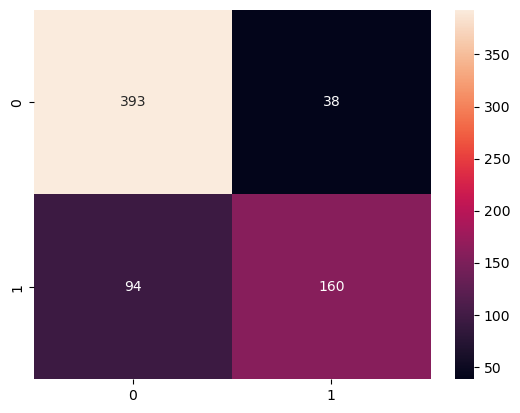

In [110]:
sns.heatmap(cm, annot=True,fmt='.3g')
plt.show()

# Random Search

In [94]:

from sklearn.model_selection import RandomizedSearchCV

In [95]:
 param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [96]:
svcm = SVC()


In [97]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)


In [98]:
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [103]:
best_parameters = random_search.best_params_
best_model = random_search.best_estimator_
print('Hyperparameters:',best_parameters)

Hyperparameters: {'kernel': 'linear', 'C': 0.1}


In [104]:
y_pred = best_model.predict(x_test)

In [106]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.8072992700729927


In [108]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Non-Persistent       0.81      0.91      0.86       431
    Persistent       0.81      0.63      0.71       254

      accuracy                           0.81       685
     macro avg       0.81      0.77      0.78       685
  weighted avg       0.81      0.81      0.80       685



Confusion Matrix:  [[393  38]
 [ 94 160]]


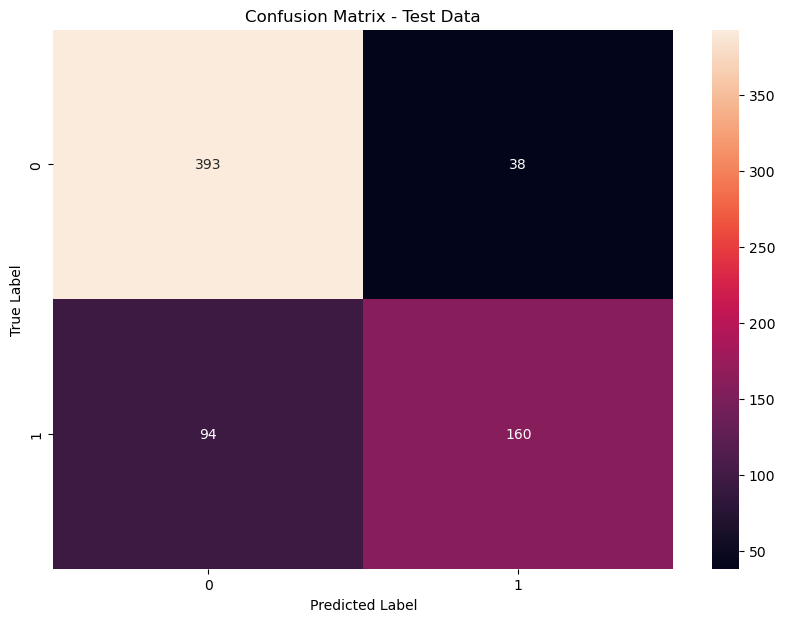

In [109]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes

In [112]:
 from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [116]:
bayes = naive_bayes.MultinomialNB()

In [117]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [118]:
y_pred_nb=bayes.predict(x_test)

In [119]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.7686915887850467

In [120]:
print(metrics.classification_report(y_test, y_pred_nb))

                precision    recall  f1-score   support

Non-Persistent       0.83      0.81      0.82       544
    Persistent       0.68      0.70      0.69       312

      accuracy                           0.77       856
     macro avg       0.75      0.75      0.75       856
  weighted avg       0.77      0.77      0.77       856



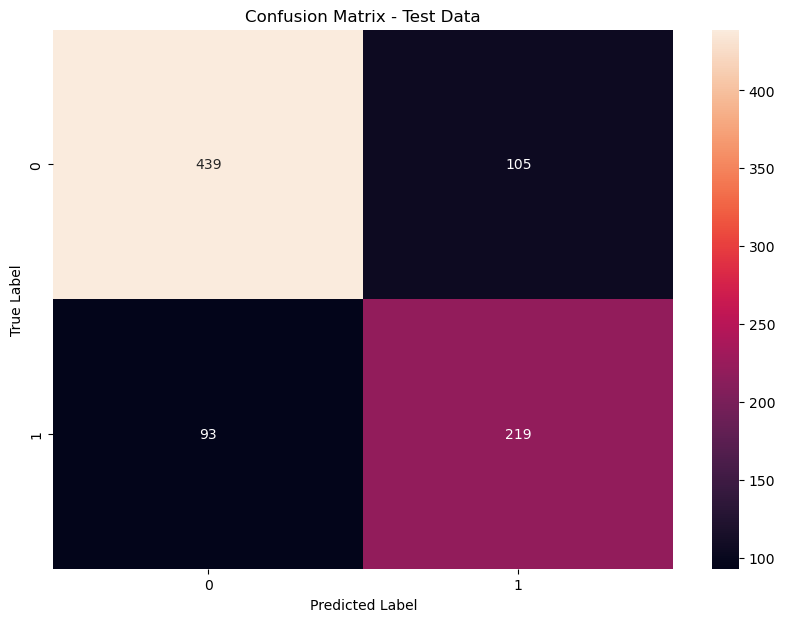

In [121]:
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [125]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(nc):
    y_score = bayes.predict_proba(x_test)[:, 1]  
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label='Persistent')
    roc_auc[i] = auc(fpr[i], tpr[i])

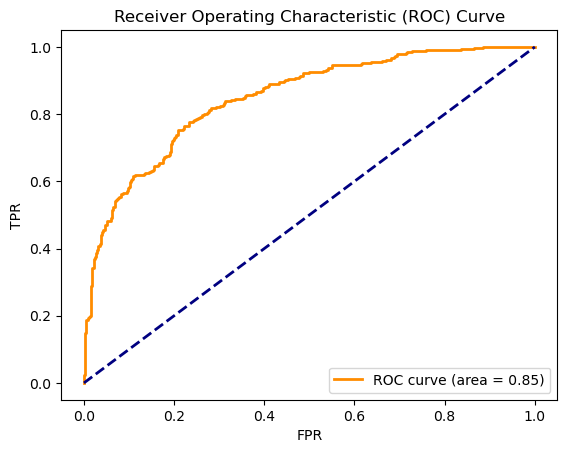

In [126]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[0]))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()    

# Tuning for Naive Bayes Model

In [127]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}


In [128]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [129]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [130]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1, 'fit_prior': True}


In [131]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.7686915887850467


In [132]:
print (classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Non-Persistent       0.83      0.81      0.82       544
    Persistent       0.68      0.70      0.69       312

      accuracy                           0.77       856
     macro avg       0.75      0.75      0.75       856
  weighted avg       0.77      0.77      0.77       856



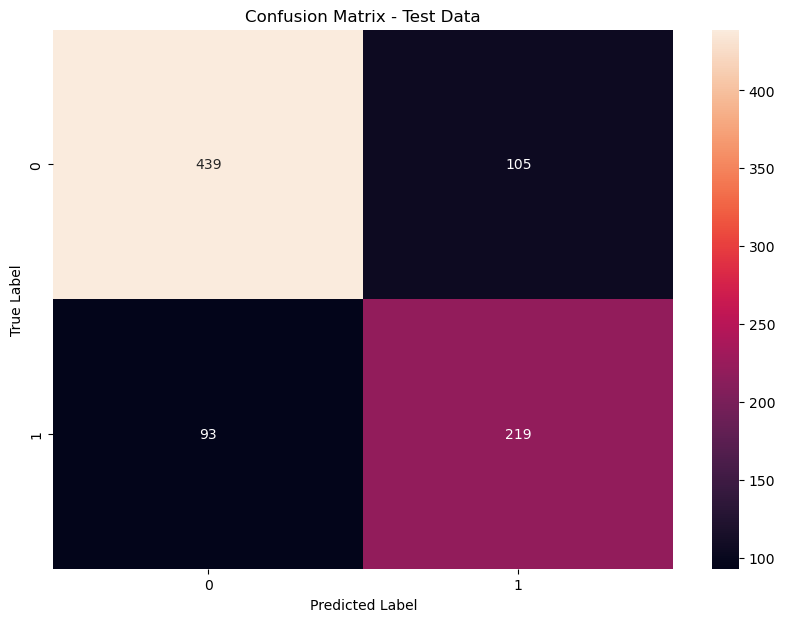

In [133]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Randomized Search 

In [134]:

from scipy.stats import uniform
param_dist = {
    'alpha': uniform(0.1, 2.0),  
    'fit_prior':[True,False]
}

In [135]:
bayes = naive_bayes.MultinomialNB()

In [136]:
from sklearn.utils.validation import check_non_negative
check_non_negative(x, "MultinomialNB (input x)")

In [138]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x, y)  

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023B3C72E750>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [139]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1.4195573464854765, 'fit_prior': True}


In [140]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [141]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.764018691588785


In [142]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Persistent       0.81      0.82      0.82       544
    Persistent       0.68      0.67      0.67       312

      accuracy                           0.76       856
     macro avg       0.75      0.74      0.74       856
  weighted avg       0.76      0.76      0.76       856



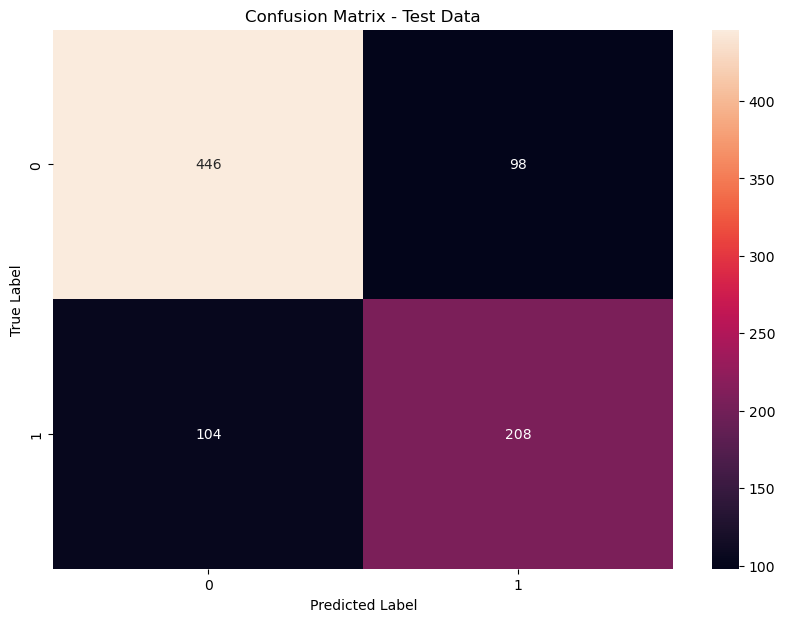

In [143]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()